# Proyecto 2
### Security Data Science
### Universidad del Valle de Guatemala

Andrés de la Roca - 20332

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport


### Visualizacion de datos

In [14]:
data = pd.read_csv('fraud_feature_engineering_example.csv')

data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,4.97,4.97,0.0,0.0,True
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,107.23,107.23,0.0,0.0,True
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,220.11,220.11,0.0,0.0,True
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,45.00,45.00,0.0,0.0,True
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,41.96,41.96,0.0,0.0,True


In [15]:
# Name of the columns
print("Available Features: ")
for i in data.columns:
    print(i)

Available Features: 
trans_date_trans_time
cc_num
merchant
category
amt
first
last
gender
street
city
state
zip
lat
long
city_pop
job
dob
trans_num
unix_time
merch_lat
merch_long
is_fraud
amt_month
amt_year
amt_month_shopping_net_spend
count_month_shopping_net
first_time_at_merchant


In [16]:
# profile = ProfileReport(data, title='Proyecto 2 Profiling Report', explorative=True)
# profile.to_file("Proyecto_2_profiling.html")

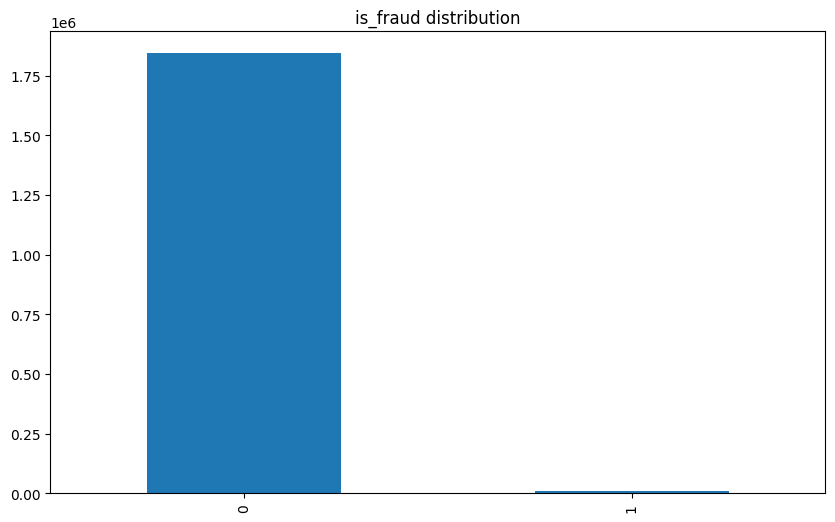

Cantidad de transacciones fraudulentas vs no fraudulentas
0    1842743
1       9651
Name: is_fraud, dtype: int64
Porcentaje de transacciones fraudulentas vs no fraudulentas
0    99.478999
1     0.521001
Name: is_fraud, dtype: float64


In [17]:
# Display is_fraud distribution 0 and 1

plt.figure(figsize=(10, 6))
data['is_fraud'].value_counts().plot(kind='bar')
plt.title('is_fraud distribution')
plt.show()

print("Cantidad de transacciones fraudulentas vs no fraudulentas")
print(data['is_fraud'].value_counts())
# Percentage of fraud transactions vs non-fraud transactions
print("Porcentaje de transacciones fraudulentas vs no fraudulentas")
print(data['is_fraud'].value_counts(normalize=True) * 100)



In [18]:
# Delete colums trans_date_trans_time
data = data.drop(columns=['trans_date_trans_time', 'state', 
                          'zip', 'trans_num', 'amt_month_shopping_net_spend', 
                          'count_month_shopping_net', 'cc_num', 'gender',
                          'first', 'last', 'job', 'dob'])

In [19]:
data.head()

,merchant,category,amt,street,city,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,first_time_at_merchant
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,561 Perry Cove,Moravian Falls,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,4.97,4.97,True
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,43039 Riley Greens Suite 393,Orient,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,107.23,107.23,True
2,fraud_Lind-Buckridge,entertainment,220.11,594 White Dale Suite 530,Malad City,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,220.11,220.11,True
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,9443 Cynthia Court Apt. 038,Boulder,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,45.00,45.00,True
4,fraud_Keeling-Crist,misc_pos,41.96,408 Bradley Rest,Doe Hill,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,41.96,41.96,True


In [20]:
data.shape

(1852394, 15)

<Figure size 1000x600 with 0 Axes>

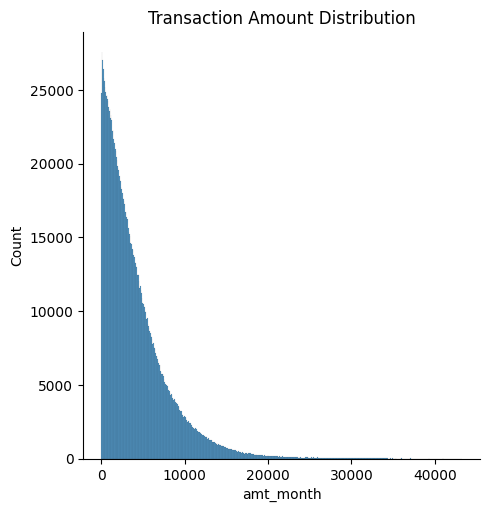

In [21]:
# Display the distribution of the transaction amount
plt.figure(figsize=(10, 6))
sns.displot(data['amt_month'])
plt.title('Transaction Amount Distribution')
plt.show()

C:\Users\Andrès DLR\AppData\Local\Temp\ipykernel_18428\4027558717.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


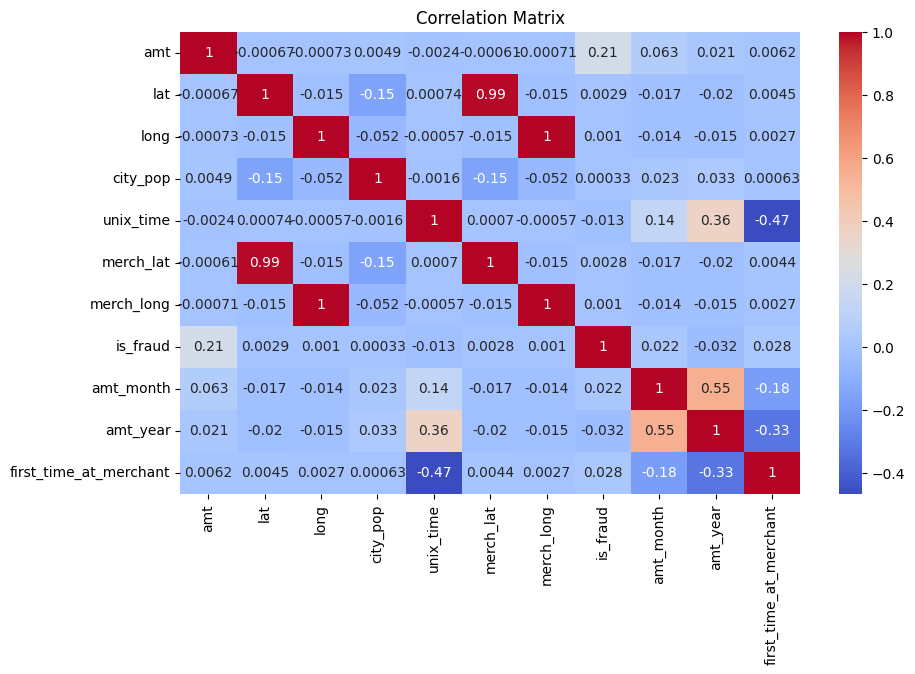

In [22]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Merchant samples
print("Merchant samples")
print(data['merchant'].value_counts().head(10))

Merchant samples
fraud_Kilback LLC        6262
fraud_Cormier LLC        5246
fraud_Schumm PLC         5195
fraud_Kuhn LLC           5031
fraud_Boyer PLC          4999
fraud_Dickinson Ltd      4953
fraud_Emard Inc          3867
fraud_Cummerata-Jones    3860
fraud_Corwin-Collins     3853
fraud_Rodriguez Group    3843
Name: merchant, dtype: int64


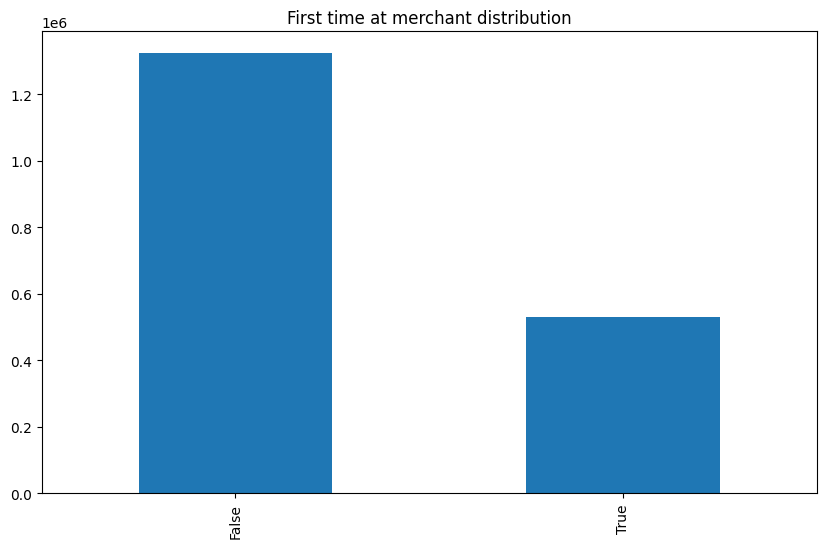

In [24]:
# First time at merchant
plt.figure(figsize=(10, 6))
data['first_time_at_merchant'].value_counts().plot(kind='bar')
plt.title('First time at merchant distribution')
plt.show()

In [25]:
# Percentage of first time at merchant
print("Percentage of first time at merchant")
print(data['first_time_at_merchant'].value_counts(normalize=True) * 100)


Percentage of first time at merchant
False    71.424654
True     28.575346
Name: first_time_at_merchant, dtype: float64


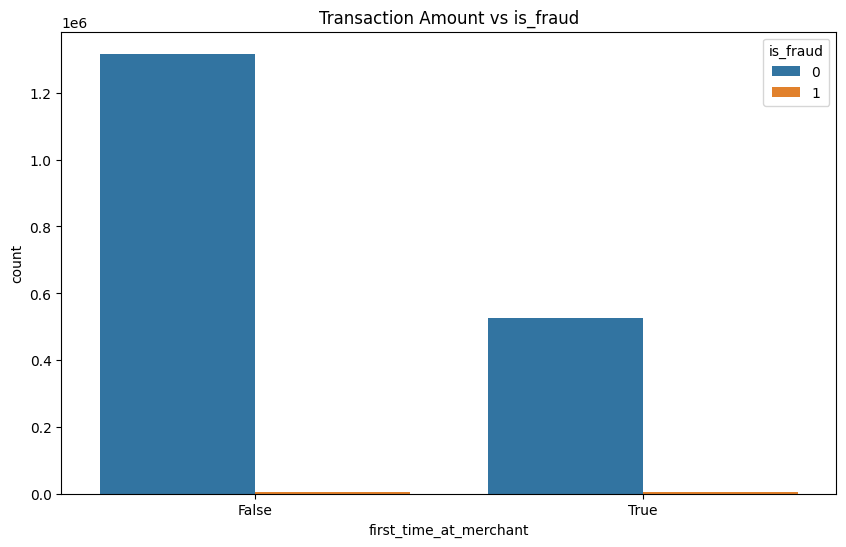

In [29]:
# Amt correlation with is_fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='first_time_at_merchant', hue='is_fraud', data=data)
plt.title('Transaction Amount vs is_fraud')
plt.show()

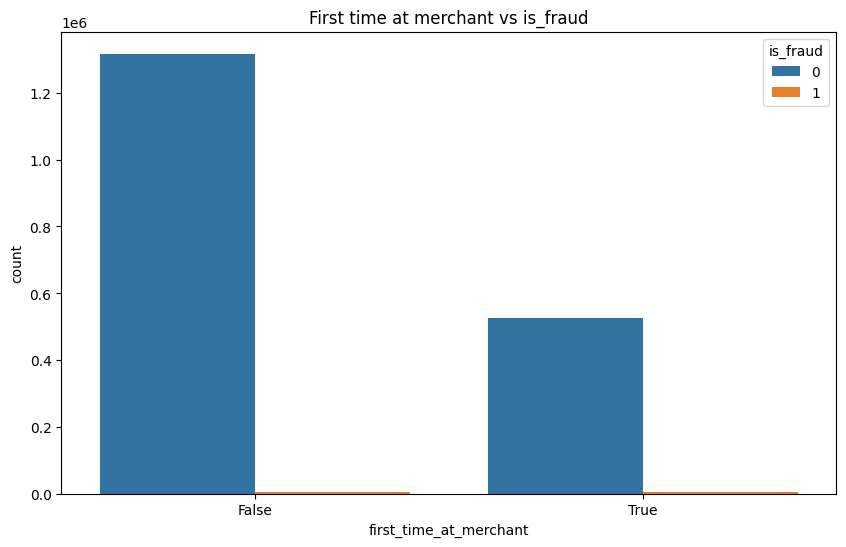

In [27]:
# First time at merchant correlation with is_fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='first_time_at_merchant', hue='is_fraud', data=data)
plt.title('First time at merchant vs is_fraud')
plt.show()

### Preprocesamiento

### Desarrollo de modelos

#### Online SVM

#### Incremental Random Forest